# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima

import pmdarima as pm



     -------------------------------------- 615.0/615.0 kB 6.5 MB/s eta 0:00:00


# loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Kiran\Downloads\archive (57)\Retail_Transactions_Dataset.csv")

# Displaying top five rows of the dataset

In [3]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None


# Getting the no of rows and columns

In [4]:
df.shape

(30000, 13)

# Obtaining the column names of the dataset

In [5]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

# Displaying data frame structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


# Getting statistical summary of the data

In [7]:
df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,3.000000e+04,30000.000000,30000.000000
mean,1.000015e+09,5.497800,52.504527
std,8.660398e+03,2.873686,27.363732
min,1.000000e+09,1.000000,5.000000
25%,1.000007e+09,3.000000,28.687500
50%,1.000015e+09,5.000000,52.480000
75%,1.000022e+09,8.000000,76.100000
max,1.000030e+09,10.000000,99.990000


# Data Cleaning: check for the Missing Values

In [8]:
df.isnull().sum().sum()

0

# checking duplicates

In [9]:
df.duplicated().sum()

0

# we have no missing values as well as duplicated values in dataset

In [10]:
#dropping Transaction ID and Customer Name 
df=df.drop("Transaction_ID",axis=1)
df=df.drop("Customer_Name",axis=1)

# Checking the data types of all the columns

In [11]:
df.dtypes

Date                  object
Product               object
Total_Items            int64
Total_Cost           float64
Payment_Method        object
City                  object
Store_Type            object
Discount_Applied        bool
Customer_Category     object
Season                object
Promotion             object
dtype: object

# Convert 'Date' column to datetime

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

# converting data types in suitable (category) types

In [13]:
df["Payment_Method"]=df["Payment_Method"].astype("category")
df["City"]=df["City"].astype("category")
df["Store_Type"]=df["Store_Type"].astype("category")
df["Customer_Category"]=df["Customer_Category"].astype("category")
df["Season"]=df["Season"].astype("category")
df["Promotion"]=df["Promotion"].astype("category")
df["Product"]=df["Product"].astype("category")

# Again checking the data types

In [14]:
df.dtypes

Date                 datetime64[ns]
Product                    category
Total_Items                   int64
Total_Cost                  float64
Payment_Method             category
City                       category
Store_Type                 category
Discount_Applied               bool
Customer_Category          category
Season                     category
Promotion                  category
dtype: object

# Data Visualization

# Bar chart for Payment Method

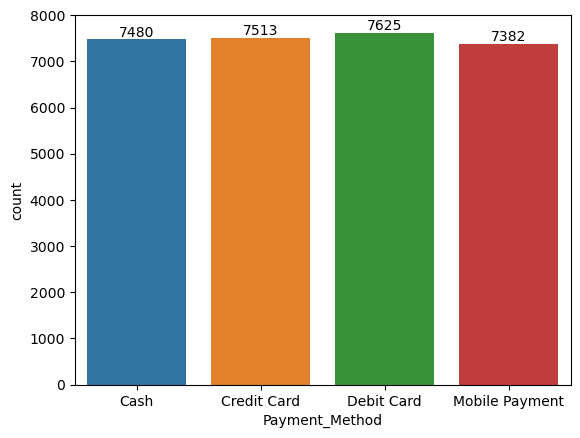

In [15]:
ax = sns.countplot(data=df,x='Payment_Method')
for bars in ax.containers:
    ax.bar_label(bars)

# bar chart for customer category

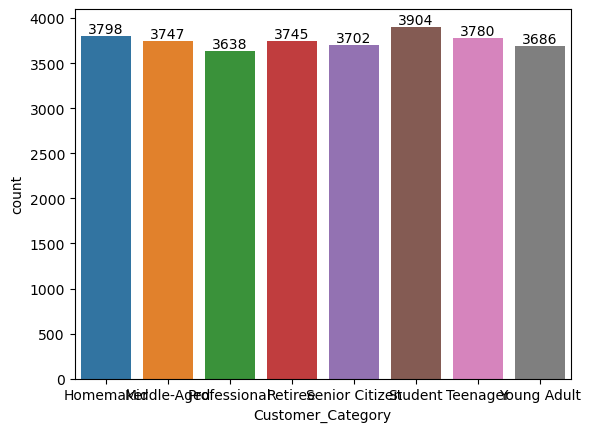

In [16]:
ax = sns.countplot(data=df,x='Customer_Category')
for bars in ax.containers:
    ax.bar_label(bars)

# Pie chart for Store Type

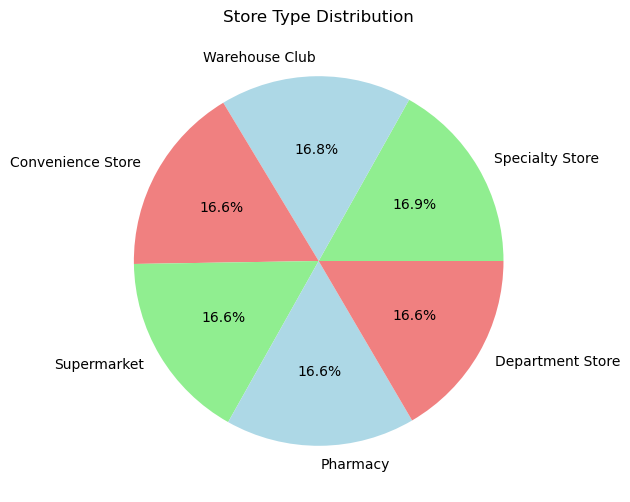

In [17]:
plt.figure(figsize=(8, 6))
df['Store_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Store Type Distribution')
plt.ylabel('')
plt.show()

# Line plot for Sales over Time

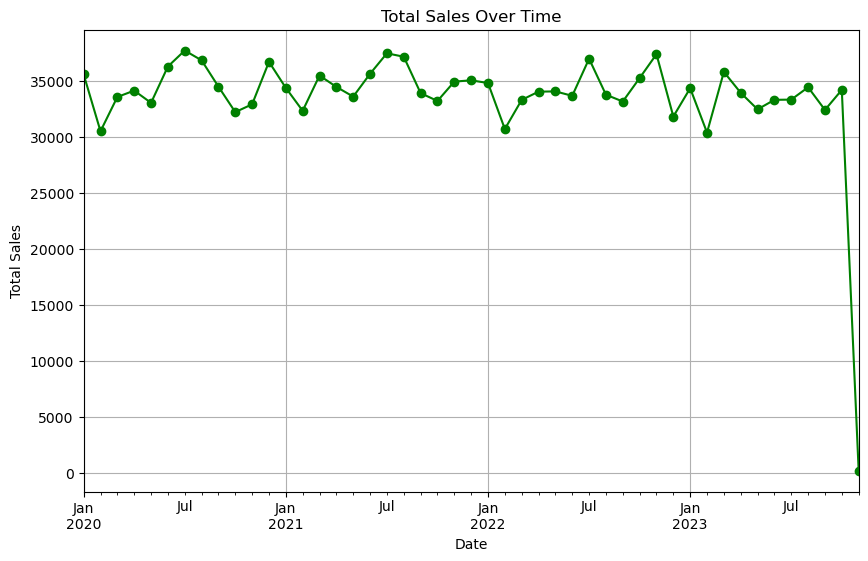

In [18]:
plt.figure(figsize=(10, 6))
df['Date'] = pd.to_datetime(df['Date'])
sales_by_date = df.groupby(df['Date'].dt.to_period('M'))['Total_Cost'].sum()
sales_by_date.plot(marker='o', color='green')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Set 'Date' column as index

In [19]:
df.set_index('Date', inplace=True)


# Resample the data to daily frequency and sum the total cost for each day

In [20]:
daily_sales = df.resample('D').agg({'Total_Cost': 'sum'})

In [21]:
daily_sales

,Total_Cost
Date,
2020-01-01,1636.29
2020-01-02,1288.59
2020-01-03,1066.00
2020-01-04,883.55
2020-01-05,1126.97
...,...
2023-10-28,1176.60
2023-10-29,941.75
2023-10-30,1011.47


# Plot the time series data

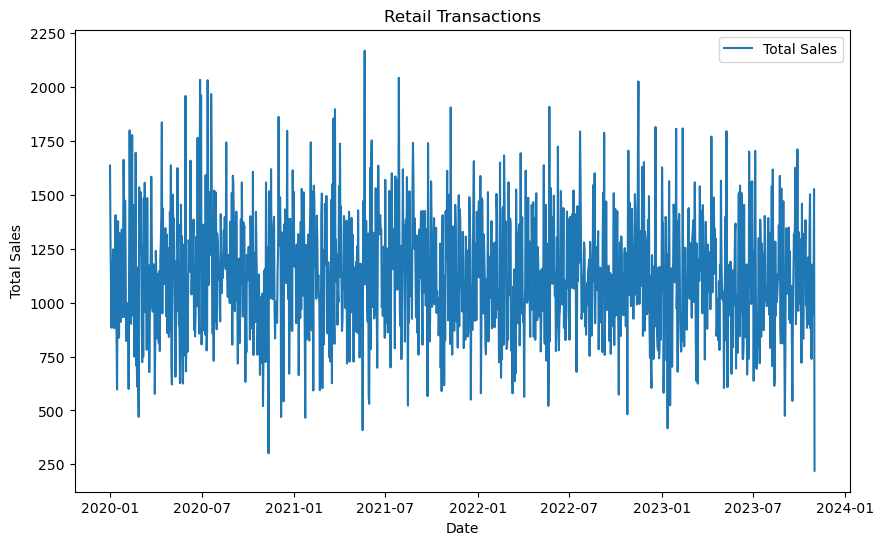

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['Total_Cost'], label='Total Sales')
plt.title('Retail Transactions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Split data into train and test sets

In [23]:
train_size = int(len(daily_sales) * 0.8)
train, test = daily_sales[:train_size], daily_sales[train_size:]

In [24]:
auto_arima_model = pm.auto_arima(train, start_p=1, start_q=1,
                                max_p=5, max_q=5, m=12,
                                start_P=0, seasonal=True,
                                d=1, D=1, trace=True,
                                error_action='ignore',  
                                suppress_warnings=True, 
                                stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=17104.183, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=16497.703, Time=1.75 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.88 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=16808.765, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=16355.993, Time=3.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.48 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=16628.431, Time=0.92 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=16226.013, Time=4.36 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=16375.528, Time=1.50 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.35 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.73 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=16164.697, Time=5.37 sec
 ARIMA(3,1,0)(1,1,0)[12]             : 

In [25]:
print("Optimal Auto Arima order:", auto_arima_model.order)
print("Optimal seasonal  order:", auto_arima_model.seasonal_order)

Optimal Auto Arima order: (5, 1, 0)
Optimal seasonal  order: (2, 1, 0, 12)


# ARIMA model

In [26]:
model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast

In [27]:
predictions_arima = model_arima_fit.forecast(steps=len(test))

# SARIMA model

In [28]:
model_sarima = SARIMAX(train, order=(5, 1, 0), seasonal_order=(2, 1, 0, 12))
model_sarima_fit = model_sarima.fit()

# Forecast

In [29]:
predictions_sarima = model_sarima_fit.forecast(steps=len(test))

# Decision Tree Regressor

# Separate features (X) and target variable (y)

In [30]:
X_train, y_train = train.index.values.reshape(-1, 1), train['Total_Cost']
X_test, y_test = test.index.values.reshape(-1, 1), test['Total_Cost']

# Initialize the Decision Tree regressor model

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the Model

In [33]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# Make Predictions

In [34]:
y_pred = dt_regressor.predict(X_test)

# Evaluate The Models

In [35]:
mse_Arima = mean_squared_error(test, predictions_arima)
mse_Sarima = mean_squared_error(test, predictions_sarima)
mse_DT = mean_squared_error(y_test, y_pred)


# Print Mean Squared Errors For Models

In [36]:
print('ARIMA MSE:',mse_Arima )
print('SARIMA MSE:',mse_Sarima)
print("Decision Tree MSE:",mse_DT )

ARIMA MSE: 74162.64530370636
SARIMA MSE: 115822.83419941801
Decision Tree MSE: 73674.07850854093


# Hence, Decision Tree Regressor has lower MSE compared to both ARIMA and SARIMA models that indicates better performance in terms of accuracy.